In [95]:
%load_ext autoreload
%autoreload 2

import numpy as np
import helper_functions as hp
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
#from keras import backend as K

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import tensorflow as tf
tf.test.gpu_device_name()
tf.test.is_gpu_available()

True

## Load in planetscope dataset and create a simple CNN with it.

In [49]:
# Load in planetscope data
#K.clear_session()
planetscope_images_tif, planetscope_labels_tif = hp.dataset_reader_planetscope('planetscope_chips_90m_3class_classified_tiles')

reading in 30466 images


In [50]:
np.unique(planetscope_labels_tif, axis=0, return_counts=True)

(array([1, 2, 3], dtype=uint16), array([ 6236,   308, 23922], dtype=int64))

In [51]:
# Encode planetscope data
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(planetscope_labels_tif.reshape(-1, 1))
planetscope_new_labels = enc.transform(planetscope_labels_tif.reshape(-1, 1)).toarray().astype('uint8')

print(planetscope_new_labels[0])
print(planetscope_new_labels.shape)

[1 0 0]
(30466, 3)


In [11]:
# Shuffle labels and images and create a train test split for planetscope data
train_images, test_images, train_labels, test_labels = train_test_split(planetscope_images_tif, planetscope_labels_tif, test_size=.2, shuffle=True)

In [114]:
# Do oversampling and data augmentation stuff here
df_dict = {"images": [], "labels": []}

for i in range(len(train_images)):
    df_dict["images"].append(train_images[i])
    df_dict["labels"].append(train_labels[i])

df = pd.DataFrame(data=df_dict)
df


,images,labels
0,"[[[437.0, 587.0, 685.0, 1897.0], [449.0, 603.0...","[0, 0, 1]"
1,"[[[187.0, 303.0, 280.0, 1228.0], [172.0, 280.0...","[0, 0, 1]"
2,"[[[405.0, 518.0, 599.0, 1809.0], [410.0, 519.0...","[0, 0, 1]"
3,"[[[447.0, 579.0, 581.0, 1609.0], [438.0, 573.0...","[0, 0, 1]"
4,"[[[565.0, 719.0, 856.0, 1996.0], [560.0, 710.0...","[0, 0, 1]"
...,...,...
24367,"[[[477.0, 622.0, 717.0, 1851.0], [494.0, 644.0...","[0, 0, 1]"
24368,"[[[1.0, 53.0, 53.0, 1337.0], [1.0, 73.0, 72.0,...","[0, 0, 1]"
24369,"[[[420.0, 542.0, 522.0, 1732.0], [442.0, 562.0...","[0, 0, 1]"
24370,"[[[466.0, 650.0, 800.0, 1889.0], [451.0, 652.0...","[0, 0, 1]"


In [12]:
# Create a simple model for the planetscope data 
model = hp.get_simple_model(train_images[0].shape)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 50)        5050      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 50)        200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 30)        37530     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 30)        120       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 30)          0         
_________________________________________

In [14]:
# Calculate initial test accuracy for planetscope data.
test_init = hp.get_test_accuracy(model, test_images, test_labels)
train_init = hp.get_train_accuracy(model, train_images, train_labels)

accuracy: 0.201
accuracy: 0.212


In [15]:
# Train model with planetscope data
history = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

Train on 24372 samples, validate on 6094 samples
Epoch 1/30
24372/24372 [==============================] - 4s 146us/sample - loss: 0.1079 - acc: 0.9724 - val_loss: 0.0910 - val_acc: 0.9806
Epoch 2/30
24372/24372 [==============================] - 3s 123us/sample - loss: 0.0697 - acc: 0.9800 - val_loss: 0.0598 - val_acc: 0.9760
Epoch 3/30
24372/24372 [==============================] - 3s 122us/sample - loss: 0.0593 - acc: 0.9825 - val_loss: 0.2161 - val_acc: 0.9762
Epoch 4/30
24372/24372 [==============================] - 3s 122us/sample - loss: 0.0559 - acc: 0.9826 - val_loss: 0.1119 - val_acc: 0.9795
Epoch 5/30
24372/24372 [==============================] - 3s 122us/sample - loss: 0.0516 - acc: 0.9842 - val_loss: 0.2473 - val_acc: 0.9705
Epoch 6/30
24372/24372 [==============================] - 3s 123us/sample - loss: 0.0518 - acc: 0.9840 - val_loss: 0.1977 - val_acc: 0.9719
Epoch 7/30
24372/24372 [==============================] - 3s 122us/sample - loss: 0.0481 - acc: 0.9847 - val_lo

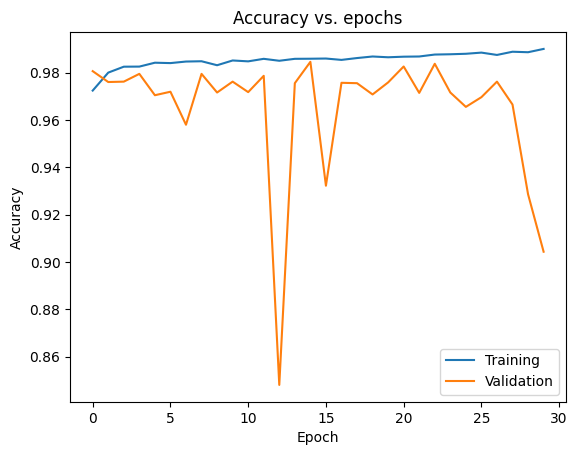

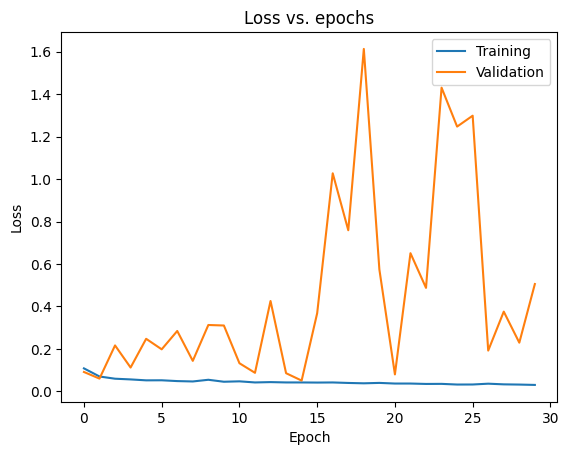

In [16]:
hp.plot_accuracy(history)
hp.plot_loss(history)

In [17]:
# Get accuracy after training the planetscope model once.
test_first = hp.get_test_accuracy(model, test_images, test_labels)
train_first = hp.get_train_accuracy(model, train_images, train_labels)

accuracy: 0.904
accuracy: 0.904


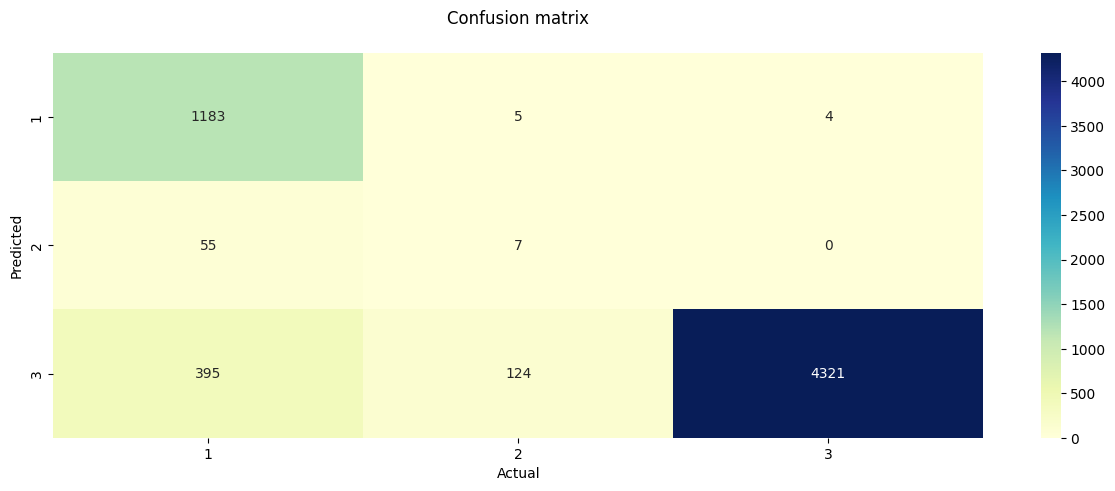

In [48]:
# Plot confusion matrix here
hp.conf_mat(model, test_images, test_labels)

## Load in the naip data and create a simple CNN with it.

In [12]:
naip_images_tif, naip_labels_tif = hp.dataset_reader_naip('naip_2018_chips_90m_3class_classified_tiles')

reading in 30444 images
read in 30441 valid images and labels


In [13]:
np.unique(naip_labels_tif, axis = 0, return_counts=True)

(array([1, 2, 3], dtype=uint16), array([ 6204,   319, 23918], dtype=int64))

In [14]:
# Encode NAIP data
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(naip_labels_tif.reshape(-1, 1))
naip_new_labels = enc.transform(naip_labels_tif.reshape(-1, 1)).toarray().astype('uint8')

print(naip_new_labels[0])
print(naip_new_labels.shape)

[1 0 0]
(30441, 3)


In [15]:
# Shuffle labels and images and create a train test split for NAIP data
train_images, test_images, train_labels, test_labels = train_test_split(naip_images_tif, naip_new_labels, test_size=.2, shuffle=True)

In [16]:
# Create a simple model for the NAIP data 
model = hp.get_simple_model(train_images[0].shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 90, 90, 50)        5050      
_________________________________________________________________
batch_normalization_4 (Batch (None, 90, 90, 50)        200       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 45, 45, 50)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 30)        37530     
_________________________________________________________________
batch_normalization_5 (Batch (None, 45, 45, 30)        120       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14520)            

In [17]:
# Calculate initial test accuracy for NAIP data.
test_init = hp.get_test_accuracy(model, test_images, test_labels)
train_init = hp.get_train_accuracy(model, train_images, train_labels)

accuracy: 0.364
accuracy: 0.371


In [18]:
# Train model with NAIP data
history = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

Train on 24352 samples, validate on 6089 samples
Epoch 1/30
24352/24352 [==============================] - 10s 430us/sample - loss: 0.0920 - acc: 0.9777 - val_loss: 0.0635 - val_acc: 0.9834
Epoch 2/30
24352/24352 [==============================] - 10s 418us/sample - loss: 0.0622 - acc: 0.9822 - val_loss: 0.0858 - val_acc: 0.9787
Epoch 3/30
24352/24352 [==============================] - 10s 403us/sample - loss: 0.0477 - acc: 0.9851 - val_loss: 0.0421 - val_acc: 0.9874
Epoch 4/30
24352/24352 [==============================] - 10s 400us/sample - loss: 0.0415 - acc: 0.9874 - val_loss: 0.0563 - val_acc: 0.9851
Epoch 5/30
24352/24352 [==============================] - 10s 402us/sample - loss: 0.0391 - acc: 0.9878 - val_loss: 0.0762 - val_acc: 0.9798
Epoch 6/30
24352/24352 [==============================] - 10s 400us/sample - loss: 0.0288 - acc: 0.9901 - val_loss: 0.0995 - val_acc: 0.9581
Epoch 7/30
24352/24352 [==============================] - 10s 403us/sample - loss: 0.0230 - acc: 0.9924 -

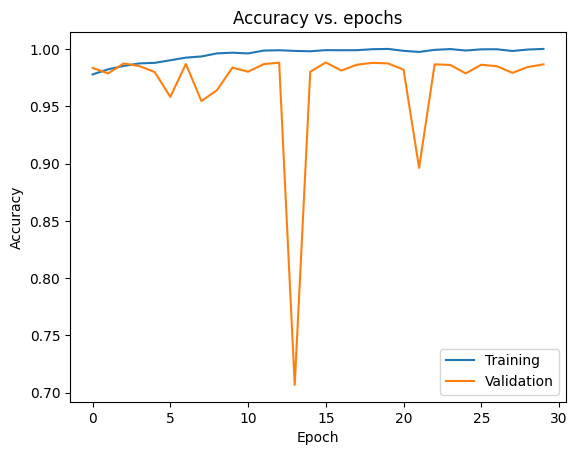

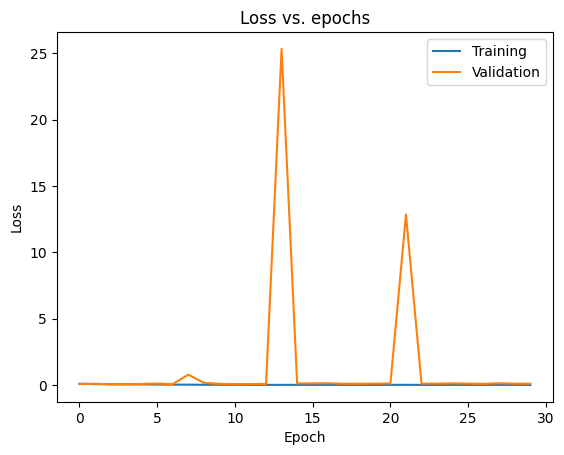

In [19]:
hp.plot_accuracy(history)
hp.plot_loss(history)

In [20]:
# Get accuracy after training the NAIP model once.
test_first = hp.get_test_accuracy(model, test_images, test_labels)
train_first = hp.get_train_accuracy(model, train_images, train_labels)

accuracy: 0.987
accuracy: 0.999
